<h1>Kauf- und Verkaufssingale von Aktien</h1>

In diesem Projekt wird versucht, die Kauf und Verkaufssingale von Aktien zu Trainieren, um anschließend diese Testen zukönnen. Um die Signale erfassen zu können werden unterschiedliche Vorgehensweisen betrachtet.

mit !pip install holen werden alle nötigen Bibliotheken geholt die nicht standmäßig mit Python installiert werden oder nur eine "Kompaktere Version" installiert wurde und daher nicht vorhanden sind.

In [1]:
# Installiere und importiere notwendige Bibliotheken
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Daten von yfinance herunterladen
stocks = ["AAPL", "MSFT", "GOOGL"]  # Apple, Microsoft, Google
data = {}
for stock in stocks:
    data[stock] = yf.download(stock, start="2010-01-01", end="2022-12-31")
    
# Beispielhafte Anzeige der ersten Zeilen für Apple
print(data['AAPL'].head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351058  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393280  447610800


In [3]:
# Datenbereinigung - Überflüssige Spalten entfernen und fehlende Werte behandeln
for stock in data:
    data[stock] = data[stock].drop(columns=['Adj Close'])
    data[stock].dropna(inplace=True)

# Überprüfung der bereinigten Daten
print(data['AAPL'].head())


                Open      High       Low     Close     Volume
Date                                                         
2010-01-04  7.622500  7.660714  7.585000  7.643214  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714  447610800


In [4]:
import numpy as np

def WMA(values, window):
    weights = np.arange(1, window + 1)
    return np.convolve(values, weights/weights.sum(), mode='valid')

def HMA(data, window):
    half_length = int(window / 2)
    sqrt_length = int(np.sqrt(window))

    wma_half = WMA(data, half_length)
    wma_full = WMA(data, window)

    # Erzeugen eines gleich langen Arrays, um mit dem restlichen DataFrame arbeiten zu können
    hma = WMA(2 * wma_half[-len(wma_full):] - wma_full, sqrt_length)

    # Padding mit NaN, um gleiche Länge wie das ursprüngliche DataFrame zu haben
    hma = np.concatenate((np.full(len(data) - len(hma), np.nan), hma))
    return hma

# Beispiel für technische Indikatoren (SMA, EMA, HMA)
def calculate_indicators(data):
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
    data['HMA_20'] = HMA(data['Close'].values, 20)
    data['HMA_50'] = HMA(data['Close'].values, 50)
    return data

# Berechnung der Indikatoren für jede Aktie
for stock in data:
    data[stock] = calculate_indicators(data[stock])

# Beispielhafte Anzeige der berechneten Indikatoren
print(data['AAPL'].head())


                Open      High       Low     Close     Volume  SMA_20  SMA_50  \
Date                                                                            
2010-01-04  7.622500  7.660714  7.585000  7.643214  493729600     NaN     NaN   
2010-01-05  7.664286  7.699643  7.616071  7.656429  601904800     NaN     NaN   
2010-01-06  7.656429  7.686786  7.526786  7.534643  552160000     NaN     NaN   
2010-01-07  7.562500  7.571429  7.466071  7.520714  477131200     NaN     NaN   
2010-01-08  7.510714  7.571429  7.466429  7.570714  447610800     NaN     NaN   

              EMA_20    EMA_50  HMA_20  HMA_50  
Date                                            
2010-01-04  7.643214  7.643214     NaN     NaN  
2010-01-05  7.644473  7.643732     NaN     NaN  
2010-01-06  7.634013  7.639454     NaN     NaN  
2010-01-07  7.623222  7.634798     NaN     NaN  
2010-01-08  7.618222  7.632285     NaN     NaN  


In [5]:
# Daten in Trainings- und Testdatensätze aufteilen
train_data = {}
test_data = {}

for stock in data:
    train, test = train_test_split(data[stock], test_size=0.2, shuffle=False)
    train_data[stock] = train
    test_data[stock] = test

# Beispielhafte Anzeige der Trainingsdaten
print(train_data['AAPL'].head())


                Open      High       Low     Close     Volume  SMA_20  SMA_50  \
Date                                                                            
2010-01-04  7.622500  7.660714  7.585000  7.643214  493729600     NaN     NaN   
2010-01-05  7.664286  7.699643  7.616071  7.656429  601904800     NaN     NaN   
2010-01-06  7.656429  7.686786  7.526786  7.534643  552160000     NaN     NaN   
2010-01-07  7.562500  7.571429  7.466071  7.520714  477131200     NaN     NaN   
2010-01-08  7.510714  7.571429  7.466429  7.570714  447610800     NaN     NaN   

              EMA_20    EMA_50  HMA_20  HMA_50  
Date                                            
2010-01-04  7.643214  7.643214     NaN     NaN  
2010-01-05  7.644473  7.643732     NaN     NaN  
2010-01-06  7.634013  7.639454     NaN     NaN  
2010-01-07  7.623222  7.634798     NaN     NaN  
2010-01-08  7.618222  7.632285     NaN     NaN  


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Features und Zielvariable definieren
features = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50']
target = 'Signal'

# Imputer-Instanz erstellen und auf die Daten anwenden
imputer = SimpleImputer(strategy='mean')
data['AAPL'][features] = imputer.fit_transform(data['AAPL'][features])

# Daten skalieren
scaler = StandardScaler()
data['AAPL'][features] = scaler.fit_transform(data['AAPL'][features])

# Funktion zur Signalerstellung
def generate_signal(data):
    data['Signal'] = 0  # Initialisiere die Spalte mit Nullen
    data.loc[data['SMA_20'] > data['SMA_50'], 'Signal'] = 1  # Kaufsignal
    data.loc[data['SMA_20'] < data['SMA_50'], 'Signal'] = -1  # Verkaufssignal
    return data

# Signal für die AAPL-Daten generieren
data['AAPL'] = generate_signal(data['AAPL'])

# Beispielhafte Anzeige der Daten mit dem Signal
print(data['AAPL'].head())

# Beispiel für das Training eines Modells
def train_model(train_data, feature_cols, target_col):
    X = train_data[feature_cols]
    y = train_data[target_col]
    model = LogisticRegression(max_iter=1000)  # Erhöhte Anzahl der Iterationen
    model.fit(X, y)
    return model

# Trainingsmodell für eine Aktie erstellen
model_aapl = train_model(data['AAPL'], features, target)

# Anzeige des Trainingsfortschritts
print("Training für AAPL abgeschlossen.")


                Open      High       Low     Close     Volume  SMA_20  SMA_50  \
Date                                                                            
2010-01-04  7.622500  7.660714  7.585000  7.643214  493729600     0.0     0.0   
2010-01-05  7.664286  7.699643  7.616071  7.656429  601904800     0.0     0.0   
2010-01-06  7.656429  7.686786  7.526786  7.534643  552160000     0.0     0.0   
2010-01-07  7.562500  7.571429  7.466071  7.520714  477131200     0.0     0.0   
2010-01-08  7.510714  7.571429  7.466429  7.570714  447610800     0.0     0.0   

              EMA_20    EMA_50  HMA_20  HMA_50  Signal  
Date                                                    
2010-01-04 -0.919508 -0.915223     NaN     NaN       0  
2010-01-05 -0.919481 -0.915212     NaN     NaN       0  
2010-01-06 -0.919703 -0.915303     NaN     NaN       0  
2010-01-07 -0.919933 -0.915403     NaN     NaN       0  
2010-01-08 -0.920039 -0.915457     NaN     NaN       0  
Training für AAPL abgeschlossen.


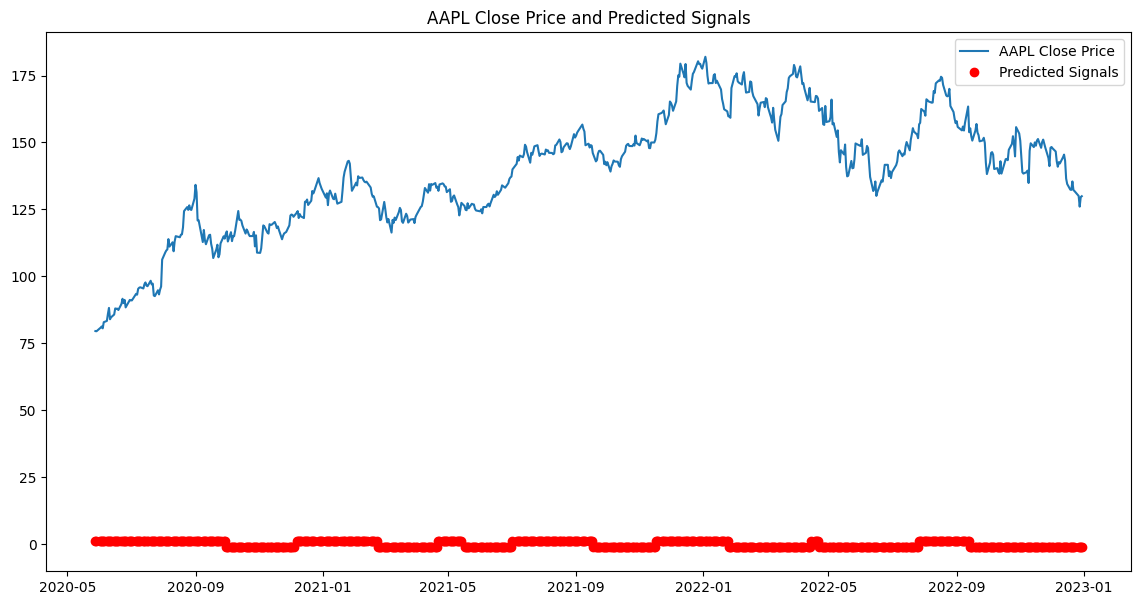

In [10]:
# Vorhersage von Signalen auf Testdaten
def predict_signals(model, test_data, feature_cols):
    X_test = test_data[feature_cols]
    predictions = model.predict(X_test)
    return predictions

# Beispiel für die Visualisierung
def plot_signals(data, predictions, stock):
    plt.figure(figsize=(14,7))
    plt.plot(data.index, data['Close'], label=f'{stock} Close Price')
    plt.plot(data.index, predictions, 'o', label='Predicted Signals', color='r')
    plt.title(f'{stock} Close Price and Predicted Signals')
    plt.legend()
    plt.show()

predictions_aapl = predict_signals(model_aapl, test_data['AAPL'], features)
plot_signals(test_data['AAPL'], predictions_aapl, 'AAPL')
